## Credit Card Kaggle Anamoly Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

### IsolationForest :-

- A lot of machine learning algorithms suffer in terms of their performance when outliers are not taken care of. In order to avoid this kind of problem you could, for example, drop them from your sample, cap the values at some reasonable point (based on domain knowledge) or transform the data.

- The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.
- In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.
- Each observation is given an anomaly score and the following decision can be made on its basis:
- - A score close to 1 indicates anomalies
- Score much smaller than 0.5 indicates normal observations
- If all scores are close to 0.5 then the entire sample does not seem to have clearly distinct anomalies.

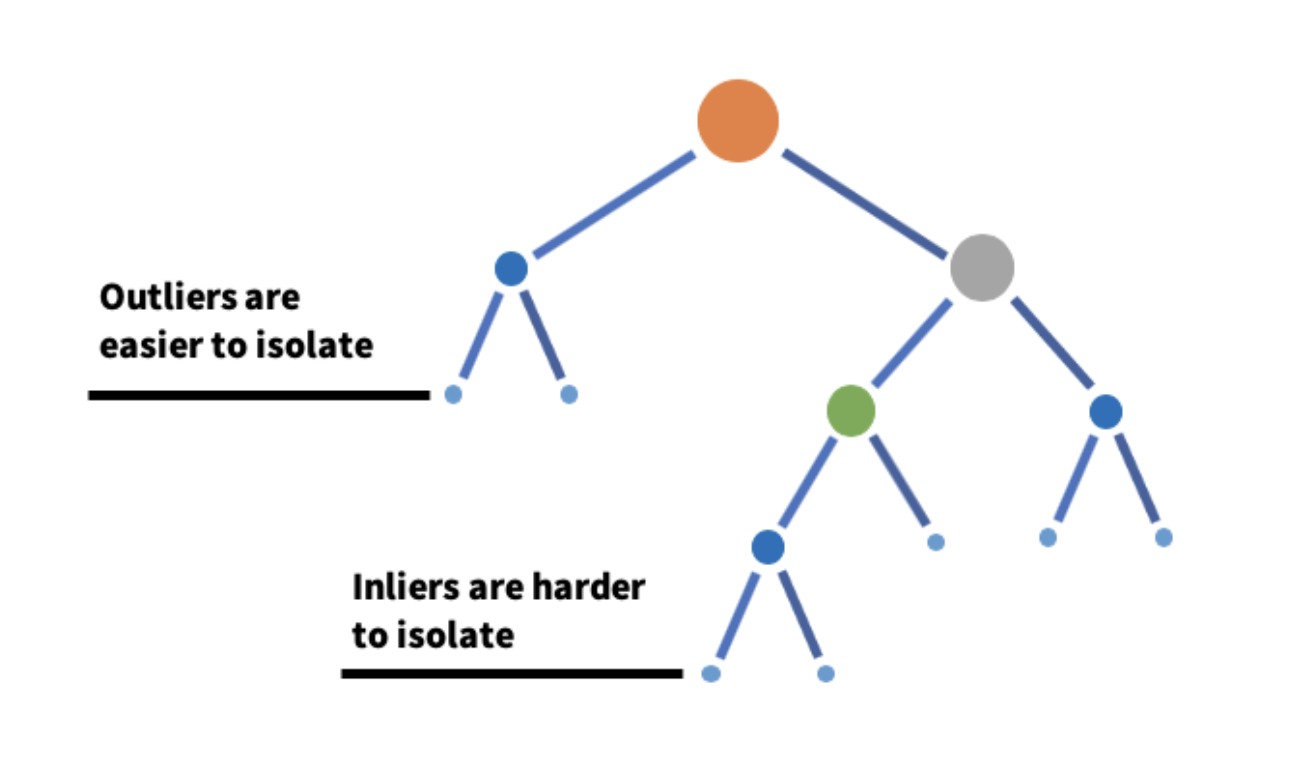

In [2]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/IsolationForest1.png',height=400,width=600)

## OneClassSVM

- A One-Class Support Vector Machine is an unsupervised learning algorithm that is trained only on the ‘normal’ data, in our case the negative examples. It learns the boundaries of these points and is therefore able to classify any points that lie outside the boundary as, you guessed it, outliers.



https://towardsdatascience.com/outlier-detection-with-one-class-svms-5403a1a1878c

In [3]:
data = pd.read_csv('C:/Users/Microsoft/Desktop/creditcard.csv',sep=',')

In [4]:
pd.pandas.set_option('max_columns',None)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.size

8829017

In [10]:
data.duplicated().sum()

1081

In [11]:
round(data.describe(),1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94813.9,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.3,0.0
std,47488.1,2.0,1.7,1.5,1.4,1.4,1.3,1.2,1.2,1.1,1.1,1.0,1.0,1.0,1.0,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.5,0.4,0.3,250.1,0.0
min,0.0,-56.4,-72.7,-48.3,-5.7,-113.7,-26.2,-43.6,-73.2,-13.4,-24.6,-4.8,-18.7,-5.8,-19.2,-4.5,-14.1,-25.2,-9.5,-7.2,-54.5,-34.8,-10.9,-44.8,-2.8,-10.3,-2.6,-22.6,-15.4,0.0,0.0
25%,54201.5,-0.9,-0.6,-0.9,-0.8,-0.7,-0.8,-0.6,-0.2,-0.6,-0.5,-0.8,-0.4,-0.6,-0.4,-0.6,-0.5,-0.5,-0.5,-0.5,-0.2,-0.2,-0.5,-0.2,-0.4,-0.3,-0.3,-0.1,-0.1,5.6,0.0
50%,84692.0,0.0,0.1,0.2,-0.0,-0.1,-0.3,0.0,0.0,-0.1,-0.1,-0.0,0.1,-0.0,0.1,0.0,0.1,-0.1,-0.0,0.0,-0.1,-0.0,0.0,-0.0,0.0,0.0,-0.1,0.0,0.0,22.0,0.0
75%,139320.5,1.3,0.8,1.0,0.7,0.6,0.4,0.6,0.3,0.6,0.5,0.7,0.6,0.7,0.5,0.6,0.5,0.4,0.5,0.5,0.1,0.2,0.5,0.1,0.4,0.4,0.2,0.1,0.1,77.2,0.0
max,172792.0,2.5,22.1,9.4,16.9,34.8,73.3,120.6,20.0,15.6,23.7,12.0,7.8,7.1,10.5,8.9,17.3,9.3,5.0,5.6,39.4,27.2,10.5,22.5,4.6,7.5,3.5,31.6,33.8,25691.2,1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Data Visualization.

In [13]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

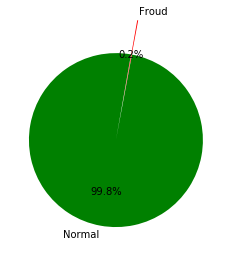

In [14]:
plt.pie(data['Class'].value_counts(),explode=[0,0.4],colors=['g','r'],startangle=80,labels=['Normal','Froud'],autopct='%1.1f%%')
plt.show()

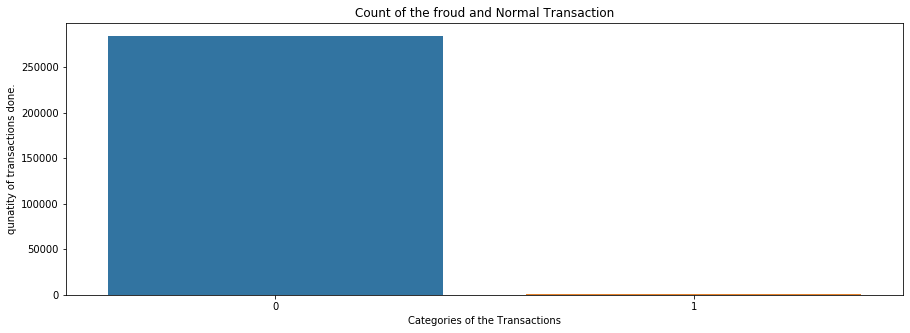

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data['Class']).set_title('Count of the froud and Normal Transaction')
plt.xlabel('Categories of the Transactions')
plt.ylabel('qunatity of transactions done.')
plt.show()

In [16]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [17]:
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [18]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

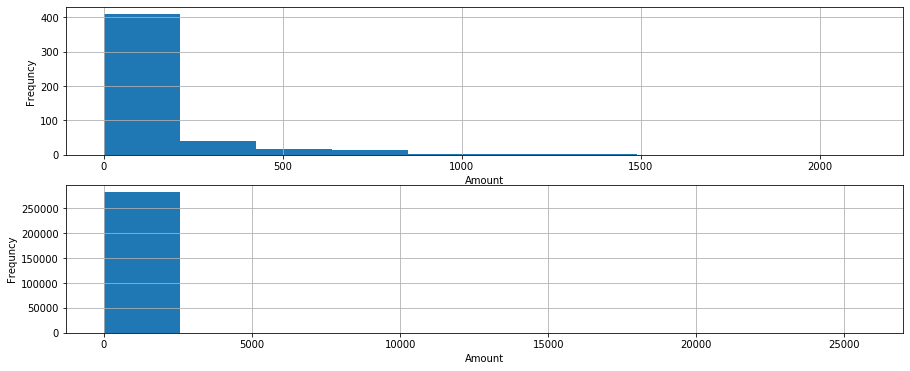

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(211)
fraud.Amount.hist()
plt.xlabel('Amount')
plt.ylabel('Frequncy')
plt.subplot(212)
normal.Amount.hist()
plt.xlabel('Amount')
plt.ylabel('Frequncy')
plt.show()

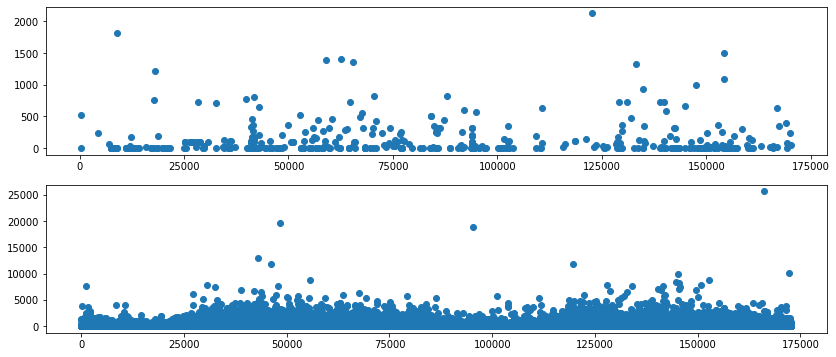

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.scatter(fraud.Time,fraud.Amount)
plt.subplot(212)
plt.scatter(normal.Time,normal.Amount)
plt.show()

In [22]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [23]:
data1.shape

(28481, 31)

In [24]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [25]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


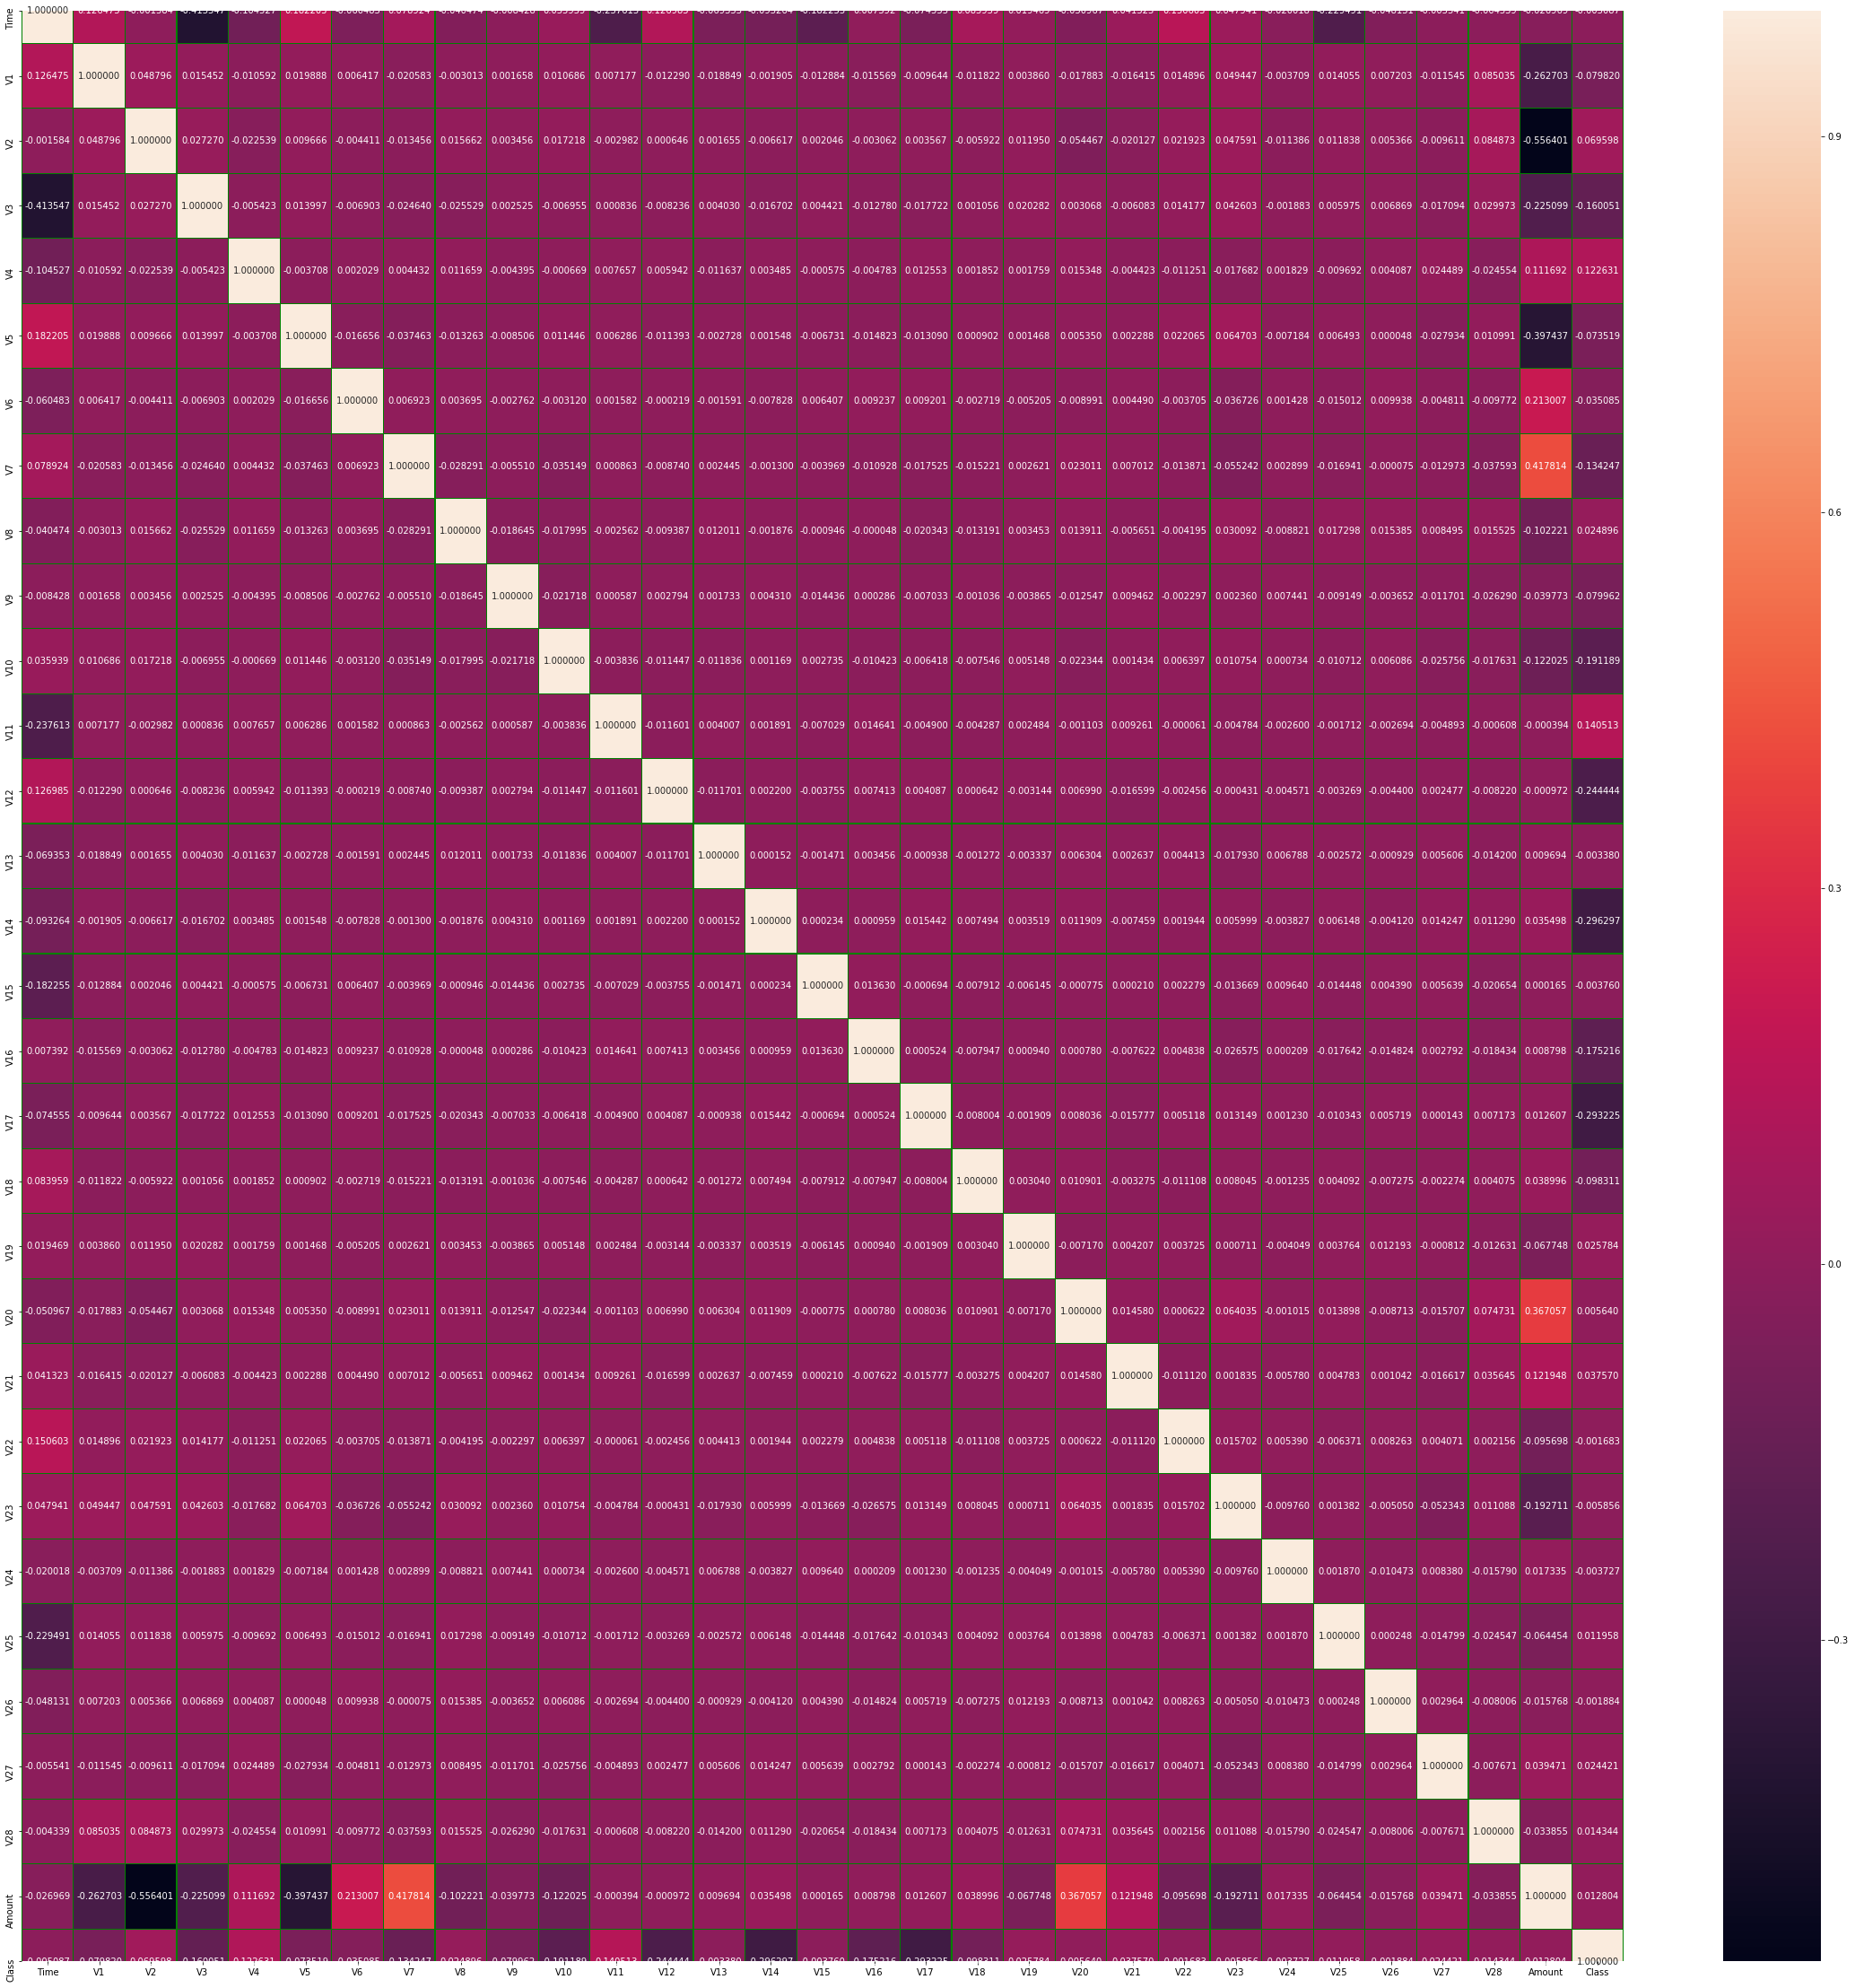

In [26]:
cormat = data1.corr()
plt.figure(figsize=(40,40))
sns.heatmap(cormat,fmt='f',linewidths=0.1,linecolor='g',annot=True)
plt.show()

## Model Prediction





Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

Let's go the predictions.

# Isolation Forest

In [27]:
x = data1.drop(columns=['Class'])
y = data1['Class']

In [28]:
number_outliers = len(fraud)
number_outliers

492

In [29]:
State = np.random.RandomState(42)

In [30]:
x_outliers = State.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))

In [31]:
model = IsolationForest(n_estimators=100,max_samples=len(x),contamination=outlier_fraction,random_state=State,verbose=0)

In [32]:
model.fit(x)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.0017234102419808666, max_features=1.0,
                max_samples=28481, n_estimators=100, n_jobs=None,
                random_state=<mtrand.RandomState object at 0x000000000C8BBDB8>,
                verbose=0, warm_start=False)

In [33]:
Score_prediction =model.decision_function(x)

In [34]:
Score_prediction

array([0.24039586, 0.25766696, 0.25629863, ..., 0.24451408, 0.20537872,
       0.24729822])

In [35]:
y_predict = model.predict(x)
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
y_predict[y_predict==1]=0  #Normal
y_predict[y_predict==-1]=1 #Froud

In [37]:
n_errors = (y_predict != y).sum()
n_errors

73

In [38]:
print('Accuracy Score :-',accuracy_score(y,y_predict))

Accuracy Score :- 0.9974368877497279


In [39]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481



## Local Outliers Factors.

In [40]:
clf = LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2, metric_params=None, contamination=outlier_fraction)

In [41]:
y_pred=clf.fit_predict(x)

In [42]:
score_predictions= clf.negative_outlier_factor_
score_predictions

array([-1.04009684, -1.01681044, -1.02971646, ..., -0.9980937 ,
       -1.05205114, -0.99057752])

In [43]:
y_pred[y_pred==-1]=1
y_pred[y_pred==1]=0

In [44]:
n_errors = (y_pred!=y).sum()
n_errors

49

In [45]:
print('Accuracy score :-',accuracy_score(y,y_pred))

Accuracy score :- 0.9982795547909132


In [46]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



#### Observations :
- Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
- Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases